# Graded-Challenge 1

*by* **Annisa Ditasila**
*batch 017*

<hr>

## Description
Graded Challenge ini dibuat untuk mengevaluasi pembelajaran pada Hacktiv8 Data Science Fulltime Program khususnya pada minggu kedua pembelajaran.

### Problem Statement
Saya adalah anggota tim Data Science di Austin Smart City dan sedang mengerjakan projek analisa sistem pembuangan dan pengelolaan sampah di kota tersebut. Dataset diambil dari [link berikut.](https://console.cloud.google.com/bigquery?p=bigquery-public-data&d=austin_waste&t=waste_and_diversion&page=table)

### Objective
Berdasarkan data yang tersedia:
1. Akan dianalisa data tersebut menggunakan statistik deskriptif dan inferensial
2. Memberikan insight kepada pemerintah kota Austin mengenai kondisi sistem pembuangan dan pengelolaan sampah.


<hr>

## Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from numpy import sqrt
import seaborn as sns

<hr>

In [2]:
Austin = pd.read_csv ("h8dsft_P0GC2_Annisa_Ditasila.csv")
Austin.head(5)

,report_date,load_time,load_type,load_weight,dropoff_site
0,2021-07-08,2021-07-08 12:00:00 UTC,TIRES,2260.0,MRF
1,2021-07-08,2021-07-08 11:00:00 UTC,TIRES,1260.0,MRF
2,2021-07-08,2021-07-08 03:00:00 UTC,TIRES,800.0,MRF
3,2021-05-01,2021-05-01 12:29:00 UTC,TIRES,760.0,MRF
4,2021-07-03,2021-07-03 12:09:00 UTC,TIRES,1400.0,MRF


In [3]:
Austin.tail(5)

,report_date,load_time,load_type,load_weight,dropoff_site
26152,2021-03-01,2021-03-01 11:26:00 UTC,ORGANICS,12100.0,ORGANICS BY GOSH
26153,2021-03-01,2021-03-01 04:27:00 UTC,ORGANICS,10900.0,ORGANICS BY GOSH
26154,2021-03-01,2021-03-01 05:55:00 UTC,ORGANICS,21800.0,ORGANICS BY GOSH
26155,2021-03-01,2021-03-02 01:10:00 UTC,ORGANICS,5640.0,ORGANICS BY GOSH
26156,2021-03-01,2021-03-01 10:22:00 UTC,RECYCLED METAL,360.0,AUSTIN IRON AND METAL


In [4]:
Austin.shape

(26157, 5)

In [5]:
Austin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26157 entries, 0 to 26156
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   report_date   26157 non-null  object 
 1   load_time     26157 non-null  object 
 2   load_type     26157 non-null  object 
 3   load_weight   25109 non-null  float64
 4   dropoff_site  26157 non-null  object 
dtypes: float64(1), object(4)
memory usage: 1021.9+ KB


<hr>

## Data Cleaning

In [6]:
Austin.isnull().sum()

report_date        0
load_time          0
load_type          0
load_weight     1048
dropoff_site       0
dtype: int64

In [7]:
Austin = Austin.dropna(axis=0, how='any')

In [8]:
Austin.isnull().sum()

report_date     0
load_time       0
load_type       0
load_weight     0
dropoff_site    0
dtype: int64

<hr>

## Data Exploring

In [9]:
Austin['report_date'] = pd.to_datetime(Austin['report_date'])

In [10]:
start_time = Austin['report_date'].sort_values().head(1)
end_time =Austin['report_date'].sort_values().tail(1)
print (start_time," \n ", end_time)

19227   2021-01-02
Name: report_date, dtype: datetime64[ns]  
  206   2021-07-09
Name: report_date, dtype: datetime64[ns]


Pengambilan data diambil di tahun 2021 yang dimulai dari *tanggal 2 Januari 2021 hingga 9 Juli 2021.*

In [11]:
type_load = Austin.groupby(Austin['load_type'])['load_weight'].sum().sort_values()

Ada **14 jenis sampah** yang di kategorikan di Kota Austin.

In [12]:
dropoff_site = Austin.groupby(Austin['dropoff_site'])['load_weight'].sum().sort_values()
dropoff_site

dropoff_site
STEINER LANDFILL         7.800000e+02
AUSTIN WOOD RECYCLING    8.100000e+03
BALCONES WOODS           8.460000e+03
WESTFIELD                1.602000e+04
AUSTIN IRON AND METAL    2.256000e+04
PARK BEND                5.354000e+04
ON ROUTE HIGH DUMP       8.768000e+04
GREAT NORTHERN           1.149200e+05
MRF                      3.023970e+05
HORNSBY BEND             1.095052e+07
TDS - MRF                2.910428e+07
BALCONES RECYCLING       3.631587e+07
ORGANICS BY GOSH         6.784991e+07
TDS LANDFILL             1.621761e+08
Name: load_weight, dtype: float64

Tersedia **14 tempat pembuangan sampah** di Kota Austin

<hr>

## Problem 1 : Statistics

In [13]:
load_type_mean = Austin.groupby(['dropoff_site'])['load_weight'].mean().sort_values(ascending=False)
load_type_mean

dropoff_site
GREAT NORTHERN           19153.333333
WESTFIELD                16020.000000
TDS LANDFILL             15169.407215
PARK BEND                13385.000000
ON ROUTE HIGH DUMP       12525.714286
ORGANICS BY GOSH         11818.482146
TDS - MRF                 9872.550882
BALCONES RECYCLING        9464.652072
BALCONES WOODS            8460.000000
HORNSBY BEND              6628.644068
AUSTIN WOOD RECYCLING     4050.000000
MRF                       1799.982143
STEINER LANDFILL           780.000000
AUSTIN IRON AND METAL      451.200000
Name: load_weight, dtype: float64

Dari data tersebut bisa disimpulkan bahwa di kota Austin tempat yang paling banyak menampung **sampah rata-rata** di 2021 adalah **Great Mothern** sebesar 19153 muatan, kemudian disusul oleh **westfield** sebesar 16020 muatan dan **TDS Landfill** sebesar 15169 muatan

In [14]:
load_type_median = Austin.groupby(['dropoff_site'])['load_weight'].median().sort_values(ascending=False)
load_type_median

dropoff_site
GREAT NORTHERN           21110.0
WESTFIELD                16020.0
ON ROUTE HIGH DUMP       14940.0
TDS LANDFILL             14920.0
PARK BEND                12330.0
ORGANICS BY GOSH         11920.0
TDS - MRF                10330.0
BALCONES RECYCLING        9840.0
BALCONES WOODS            8460.0
HORNSBY BEND              6390.0
AUSTIN WOOD RECYCLING     4050.0
MRF                       1360.0
STEINER LANDFILL           780.0
AUSTIN IRON AND METAL      400.0
Name: load_weight, dtype: float64

jika dilihan dari **nilai tengahnya**, urutan pertaama tetap ditempati oleh **Great Nothern** sebesar 21110 muatan, kemudian **Westfield** sebesar 16020, dan **On Route High Dump** sebesar 14940 muatan.

In [15]:
load_type_mode = Austin.groupby(['dropoff_site'])['load_weight'].apply(pd.Series.mode).sort_index()
load_type_mode

dropoff_site            
AUSTIN IRON AND METAL  0      260.0
                       1      320.0
                       2      520.0
AUSTIN WOOD RECYCLING  0     2340.0
                       1     5760.0
BALCONES RECYCLING     0    11880.0
BALCONES WOODS         0     8460.0
GREAT NORTHERN         0     8700.0
                       1    17160.0
                       2    20900.0
                       3    21320.0
                       4    21960.0
                       5    24880.0
HORNSBY BEND           0     5500.0
MRF                    0      960.0
ON ROUTE HIGH DUMP     0     4060.0
                       1     7480.0
                       2    12500.0
                       3    14940.0
                       4    15040.0
                       5    15200.0
                       6    18460.0
ORGANICS BY GOSH       0    14580.0
PARK BEND              0     8480.0
                       1     8960.0
                       2    15700.0
                       3    20400.0
STE

Berdasarkan perhitungan nilai modus, dapat diketahui bahwa beberapa dropoff site *memiliki satu nilai modus* dan beberapa dropoff site lainnya yang memiliki *nilai modus lebih dari satu (multimodal).*

Tempat pembuangan yang memiliki **satu nilai modus** adalah:
- Balcons Recycling
- Balcons Woods
- Hornsby Bend
- MRF 
- Organics by Gosh
- Steiner Landfill
- TDS - MRF 
- Westfield

Tempat Pembuangan  yang **multimodal** adalah:
- Austin Iron and Metal
- Austin Wood Recycling
- Great Northern
- On Route High Dump
- Park Bend
- TDS Landfill


## TESTING SITE

Tempat pembuangan sampah yang dipilih adalah **Austin Iron and Metal** karena tempat tersebut menempati urutan paling bawah diantara tempat lainnya dengan data rata-ratanya 451, mediannya 400, dan multimoda di angka 260,320, dan 520.

In [16]:
AUSTIN_IRON_AND_METAL  = Austin[Austin['dropoff_site']=='AUSTIN IRON AND METAL']
AUSTIN_IRON_AND_METAL.sort_values('report_date')

,report_date,load_time,load_type,load_weight,dropoff_site
19687,2021-01-05,2021-01-05 11:00:00 UTC,RECYCLED METAL,260.0,AUSTIN IRON AND METAL
19872,2021-01-06,2021-01-06 10:07:00 UTC,RECYCLED METAL,220.0,AUSTIN IRON AND METAL
20785,2021-01-13,2021-01-13 11:54:00 UTC,RECYCLED METAL,640.0,AUSTIN IRON AND METAL
21516,2021-01-19,2021-01-19 11:02:00 UTC,RECYCLED METAL,830.0,AUSTIN IRON AND METAL
23735,2021-02-04,2021-02-04 10:57:00 UTC,RECYCLED METAL,140.0,AUSTIN IRON AND METAL
24099,2021-02-08,2021-02-08 11:03:00 UTC,RECYCLED METAL,390.0,AUSTIN IRON AND METAL
24288,2021-02-09,2021-02-09 11:40:00 UTC,RECYCLED METAL,780.0,AUSTIN IRON AND METAL
24501,2021-02-10,2021-02-10 11:06:00 UTC,RECYCLED METAL,180.0,AUSTIN IRON AND METAL
25156,2021-02-23,2021-02-23 11:42:00 UTC,RECYCLED METAL,400.0,AUSTIN IRON AND METAL
26156,2021-03-01,2021-03-01 10:22:00 UTC,RECYCLED METAL,360.0,AUSTIN IRON AND METAL


#### Outlier

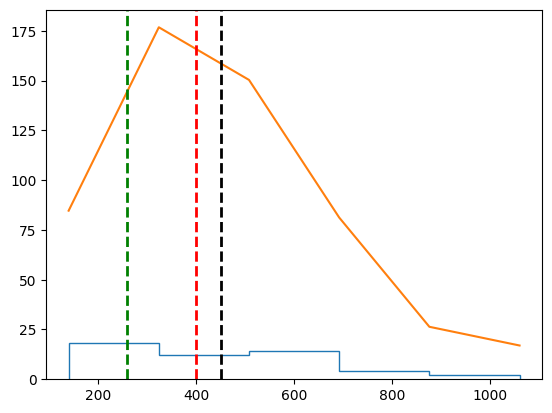

In [17]:
AUSTIN_IRON_AND_METAL = Austin.loc[Austin['dropoff_site'] == 'AUSTIN IRON AND METAL']['load_weight']
density = stats.gaussian_kde(AUSTIN_IRON_AND_METAL)
n, x, _ = plt.hist(AUSTIN_IRON_AND_METAL, histtype='step', bins=5)  
plt.plot(x, density(x)*10**5)
plt.axvline(AUSTIN_IRON_AND_METAL.mean(), color='black', linestyle='dashed', linewidth=2)
plt.axvline(AUSTIN_IRON_AND_METAL.median(), color='red', linestyle='dashed', linewidth=2)
plt.axvline(AUSTIN_IRON_AND_METAL.mode()[0], color='green', linestyle='dashed', linewidth=2)
plt.show()


In [18]:
AUSTIN_IRON_AND_METAL  = Austin[Austin['dropoff_site']=='GREAT NORTHERN']
print ("Median: " + str(AUSTIN_IRON_AND_METAL['load_weight'].median()))
print ("Mean: " + str(AUSTIN_IRON_AND_METAL['load_weight'].mean()))
print ("Mode: " + str(AUSTIN_IRON_AND_METAL['load_weight'].mode()[0]))
print ("Min: " + str(AUSTIN_IRON_AND_METAL['load_weight'].min()))
print ("Max: " + str(AUSTIN_IRON_AND_METAL['load_weight'].max()))
print ("Skew: " + str(AUSTIN_IRON_AND_METAL['load_weight'].skew()))

Median: 21110.0
Mean: 19153.333333333332
Mode: 8700.0
Min: 8700.0
Max: 24880.0
Skew: -1.50900963982105


Karena nilai median > mean > modus maka bisa di kategorikan sebagai **Positive skew** dan skew digambarkan sangat miring karena Skewness < -0,5.

In [20]:
AUSTIN_IRON_AND_METAL_df = Austin.loc[Austin['dropoff_site'] == 'AUSTIN IRON AND METAL']['load_weight']
AUSTIN_IRON_AND_METAL_df = pd.DataFrame(AUSTIN_IRON_AND_METAL_df, columns=['load_weight'])
AUSTIN_IRON_AND_METAL_df.describe()

,load_weight
count,50.000000
mean,451.200000
std,215.649375
min,140.000000
25%,290.000000
50%,400.000000
75%,557.500000
max,1060.000000


3705.0


Text(0.5, 1.0, 'Load Weight in Austin Iron and Metal')

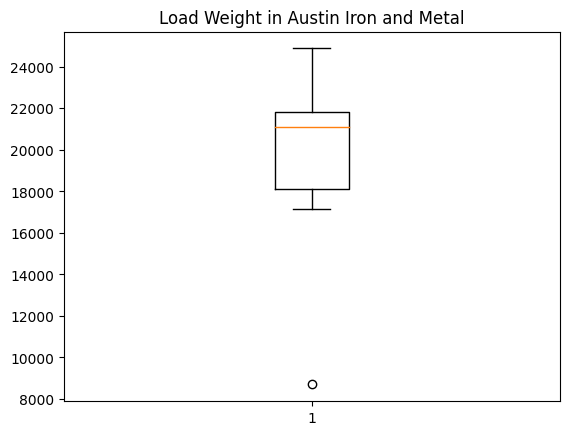

In [36]:
Q1, Q3 = np.percentile(AUSTIN_IRON_AND_METAL_df['load_weight'],[25,75])
IQR = Q3 - Q1
print(IQR)

lower_limit = Q1 - (1.5 * IQR)
upper_limit = Q3 + (1.5 * IQR)

plt.boxplot(AUSTIN_IRON_AND_METAL_df['load_weight'])
plt.title('Load Weight in Austin Iron and Metal')

In [22]:
AUSTIN_IRON_AND_METAL_df_no_outliers = AUSTIN_IRON_AND_METAL_df[(AUSTIN_IRON_AND_METAL_df['load_weight'] > lower_limit) & (AUSTIN_IRON_AND_METAL_df['load_weight'] < upper_limit)]


In [23]:
AUSTIN_IRON_AND_METAL_df_no_outliers.describe()

,load_weight
count,48.000000
mean,426.250000
std,180.514925
min,140.000000
25%,287.500000
50%,395.000000
75%,542.500000
max,830.000000


Text(0.5, 1.0, 'Load Weight in Austin Iron and Metal After Outlier Removal')

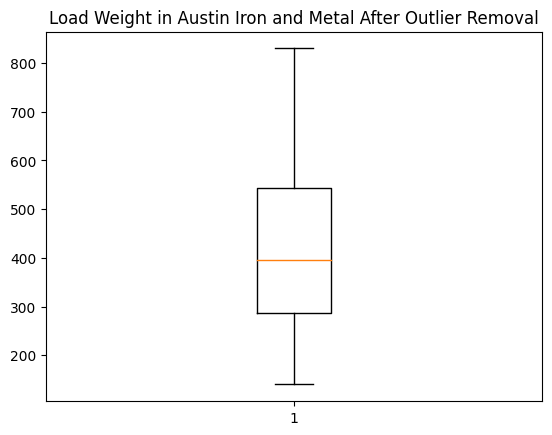

In [38]:
plt.boxplot(AUSTIN_IRON_AND_METAL_df_no_outliers['load_weight'])
plt.title('Load Weight in Austin Iron and Metal After Outlier Removal')

In [25]:
AUSTIN_IRON_AND_METAL_df  = Austin[Austin['dropoff_site']=='GREAT NORTHERN']
print('Nilai mean, median dan modus sebelum data outlier dihapus:')
print ("Median: " + str(AUSTIN_IRON_AND_METAL_df['load_weight'].median()))
print ("Mean: " + str(AUSTIN_IRON_AND_METAL_df['load_weight'].mean()))
print ("Mode: " + str(AUSTIN_IRON_AND_METAL_df['load_weight'].mode()[0]))
print ('\n')
print('Nilai mean, median dan modus sesudah data outlier dihapus:')
print ("Median: " + str(AUSTIN_IRON_AND_METAL_df_no_outliers['load_weight'].median()))
print ("Mean: " + str(AUSTIN_IRON_AND_METAL_df_no_outliers['load_weight'].mean()))
print ("Mode: " + str(AUSTIN_IRON_AND_METAL_df_no_outliers['load_weight'].mode()[0]))

Nilai mean, median dan modus sebelum data outlier dihapus:
Median: 21110.0
Mean: 19153.333333333332
Mode: 8700.0


Nilai mean, median dan modus sesudah data outlier dihapus:
Median: 395.0
Mean: 426.25
Mode: 260.0


In [26]:
(str(AUSTIN_IRON_AND_METAL_df_no_outliers['load_weight'].sum()/(AUSTIN_IRON_AND_METAL_df['load_weight'].sum()-(AUSTIN_IRON_AND_METAL_df_no_outliers['load_weight'].sum()))*100) + '%')

'21.659961888630107%'

Di tempat pembuangan Austin Iron and Metal ada **21% outliers.** Jika kita lihat datanya, muatan yang melebihi 830 dikategorikan sebagai ouliers.

#### Range, Variance, dan Standar Deviasi pada muatan tampungan di Austin and Metal.

In [27]:
print('Range:')
print(round(AUSTIN_IRON_AND_METAL_df_no_outliers['load_weight'].max() - AUSTIN_IRON_AND_METAL_df_no_outliers['load_weight'].min(),2))

print('Variance: ')
print(AUSTIN_IRON_AND_METAL_df_no_outliers['load_weight'].var())

print('Standar Deviasi:')
print(AUSTIN_IRON_AND_METAL_df_no_outliers.load_weight.std())

Range:
690.0
Variance: 
32585.63829787234
Standar Deviasi:
180.5149254158014


In [28]:
AUSTIN_IRON_AND_METAL_df_no_outliers.describe()

,load_weight
count,48.000000
mean,426.250000
std,180.514925
min,140.000000
25%,287.500000
50%,395.000000
75%,542.500000
max,830.000000


Di tempat pembuangan Austin Iron and Metal bisa disimpulkan bahwa **standar deviasi adalah 180,5.** , maka jika dihitung dari penyimpangannya dari mean adalah sebesar 606,75. Muatan yang terlalu banyak dari nilai tersebut dianggap outliers.

#### Confidence Interval

Data yang diambil adalah data keseluruhan dengan data yang sudah dihapus outliersnya. Kapasitas penampungan untuk tempat pembuangan sampah terbaru bisa diperkirakan dengan menggunakan nilai confidence interval

9320.0


Text(0.5, 1.0, 'Load Weight In Austin City')

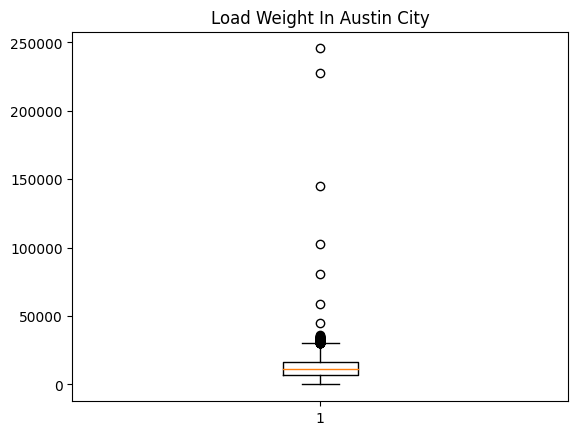

In [39]:
# Data Keseluruhan di kota Austin
Q1, Q3 = np.percentile(Austin['load_weight'],[25,75])
IQR = Q3 - Q1
print(IQR)

lower_limit = Q1 - (1.5 * IQR)
upper_limit = Q3 + (1.5 * IQR)

plt.boxplot(Austin['load_weight'])
plt.title('Load Weight In Austin City')

Text(0.5, 1.0, 'Loud Weight in Austin After Outlier Removal')

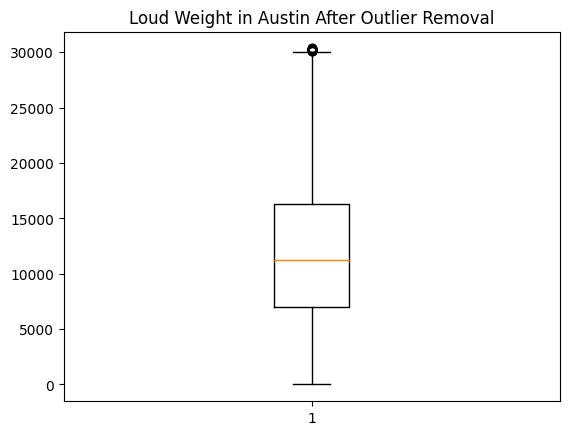

In [40]:
# Menghapus data outliers
Austin_no_outliers = Austin[(Austin['load_weight'] > lower_limit) & (Austin['load_weight'] < upper_limit)]
plt.boxplot(Austin_no_outliers['load_weight'])
plt.title('Loud Weight in Austin After Outlier Removal')

In [31]:
ci = stats.norm.interval(0.95, Austin_no_outliers.load_weight.mean(), Austin_no_outliers.load_weight.std())
ci = round(ci[1],2)
ci

25084.81

Dari data tersebut bisa diperkiraan **tempat penampungan yang baru tidak melebihi 25084 muatan.**

### Uji Hipotesis

Hipotesis:

Apakah rata-rata harian muatan sampah pada dua tempat berbeda secara signifikan atau tidak?

Sample yang dipilih adalah Austin Iron and Metal dan Austin Wood Rescycling.

H0 : Tidak ada perbedaan yang signifikan antara rata-rata harian Austin Iron and Metal dan rata-rata harian Austin Wood Rescycling.
H1 : Terdapat perbedaan yang siginifikan antara rata-rata harian Austin Iron and Metal dan rata-rata harian Austin Wood Rescycling.

In [32]:
# Menghitung rata-rata Austin Iron and Metal dan Austin Wood Recycling
AIM = Austin[Austin['dropoff_site'] == 'AUSTIN IRON AND METAL'][['report_date', 'load_weight']].groupby('report_date').sum()
AWR = Austin[Austin['dropoff_site'] == 'AUSTIN WOOD RECYCLING'][['report_date', 'load_weight']].groupby('report_date').sum()

print('Rata-rata load weight di Austin Iron and Metal per hari: {}'.format(np.round(AIM.load_weight.mean())))
print('Rata-rata load weight di Austin Wood recycling per hari: {}'.format(np.round(AWR.load_weight.mean())))

# Menghitung nilai p-value dengan t-test
t_stat, p_val = stats.ttest_ind(AIM, AWR)
print('\nP-value:',p_val[0])
print('t-statistics:',t_stat[0])

# Menghitung mean sample
AIM_mean = np.random.normal(AIM.load_weight.mean(), AIM.load_weight.std(),10000)
AWR_mean = np.random.normal(AWR.load_weight.mean(), AWR.load_weight.std(),10000)

# Menghitung nilai confidence interval
ci = stats.norm.interval(0.95, AIM.load_weight.mean(), AIM.load_weight.std())


Rata-rata load weight di Austin Iron and Metal per hari: 451.0
Rata-rata load weight di Austin Wood recycling per hari: 4050.0

P-value: 7.64275178633308e-17
t-statistics: -12.378779757780721


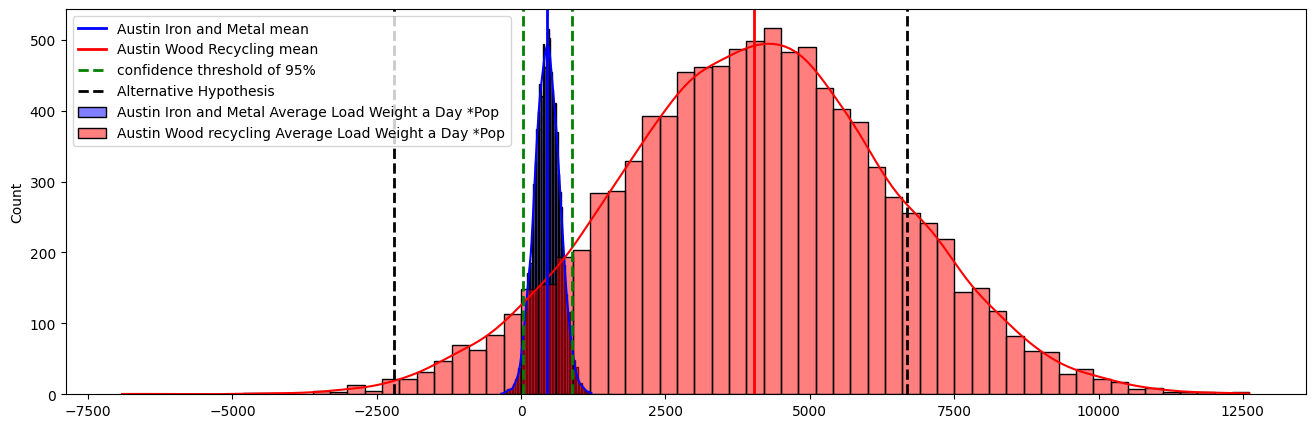

In [33]:
# Visualisasi grafik
plt.figure(figsize=(16,5))
sns.histplot(AIM_mean, label='Austin Iron and Metal Average Load Weight a Day *Pop',color='blue', kde=True)
sns.histplot(AWR_mean, label='Austin Wood recycling Average Load Weight a Day *Pop',color='red', kde=True)

plt.axvline(AIM_mean.mean(), color='blue', linewidth=2, label='Austin Iron and Metal mean')
plt.axvline(AWR_mean.mean(), color='red',  linewidth=2, label='Austin Wood Recycling mean')

plt.axvline(ci[1], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')
plt.axvline(ci[0], color='green', linestyle='dashed', linewidth=2)

plt.axvline(AIM_mean.mean()+t_stat[0]*AIM_mean.std(), color='black', linestyle='dashed', linewidth=2, label = 'Alternative Hypothesis')
plt.axvline(AWR_mean.mean()-t_stat[0]*AIM_mean.std(), color='black', linestyle='dashed', linewidth=2)

plt.legend()

Dari grafik diatas bisa disimpulkan bahwa terdapat perbedaan yang sangat signifikan antara rata-rata harian muatan sampah di Austin Iron and Metal and Austin Wood Recycling.

<hr>

Teknik apa yang kamu pilih untuk handling outlier? jelaskan alasannya!

Teknik yang dipilih untuk mengatasi outlier adalah dengan perhitungan Inter-Quantile Range (IQR). Karena data mememiliki distribusi Left-Skewness. Setelah perhitungan selesai, data outlier yang ada pada data akan dihapus

Apa konsep dibalik confidence interval sehingga kita dapat menggunakannya untuk menyelesaikan langkah pada nomor 7?

Confidence Interval digunakan untuk menentukan keakuratan nilai rata-rata suatu sample terhadap populasinya. Dengan menggunakan confidence interval, kita dapat melakukan estimasi berapa rata-rata terkecil dan berapa rata-rata terbesar yang ada pada suatu populasi. Sehingga, kita tidak perlu menghitung secara keseluruhan populasi, karena dapat diperkirakan dari nilai confidence interval.

Jelaskan jenis uji hipotesis apa yang kamu terapkan dan mengapa?

Jenis uji hipotesis yang digunakan adalah Two Samples Independent Two Tailed Hypothesis Testing. Karena yang diuji adalah rata-rata dari 2 populasi yang independen.

<hr>

## Problem 2 (Math/Calculus)

**Rumus :**
*w_besok = w_hari_ini + v * (t1-t)*

In [34]:
df_prediction = Austin.groupby(Austin['report_date'])['load_weight'].sum()
df_prediction = df_prediction.to_frame().reset_index()
df_prediction.columns = ['report_date', 'load_weight']
df_prediction.sort_values('report_date', ascending=True)

,report_date,load_weight
0,2021-01-02,2170130.0
1,2021-01-04,2920260.0
2,2021-01-05,2388540.0
3,2021-01-06,2396550.0
4,2021-01-07,2438330.0
...,...,...
160,2021-07-05,1897290.0
161,2021-07-06,1921640.0
162,2021-07-07,1553080.0
163,2021-07-08,1417650.0


In [35]:
x = df_prediction.index.values
y = df_prediction.load_weight.values

v = np.gradient(y,x)

w = df_prediction.load_weight[164] + (v * 1)
w[164]

-1176970.0

<hr>

1. Untuk menghitung turunan pertama dapat digunakan metode simbolik dan numerik, untuk kasus ini, teknik apa yang kamu gunakan?

Teknik yang digunakan adalah teknik numerik. Karena dataset yang ditampilkan berbentuk array dan output yang diharapkan adalah data numerik.

2. Apakah kamu membutuhkan fungsi matematis untuk menghitung turunannya? (ya/tidak) berikan alasanmu!

Ya, karena untuk memprediksi sebuah kemungkinan terjadi harus menggunakan fungsi matematis yaitu fungsi turunan.

3. Berapa load weight yang kamu perkirakan di hari esok (10 Juli 2021)?

1176970

<hr>